In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
X_data = pd.read_csv('crx_data_train_x.csv', header=None, na_values='?')
X_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,b,35.58,0.75,u,g,k,v,1.500,f,f,0,t,g,231.0,0
1,b,34.92,2.50,u,g,w,v,0.000,t,f,0,t,g,239.0,200
2,b,NaN,4.00,y,p,i,v,0.085,f,f,0,t,g,411.0,0
3,a,46.08,3.00,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
4,a,23.58,0.83,u,g,q,v,0.415,f,t,1,t,g,200.0,11


In [4]:
y_data = pd.read_csv('crx_data_train_y.csv', header=None, na_values='?')
y_data.head()

,0
0,0
1,1
2,0
3,1
4,0


In [6]:
X_data.shape

(483, 15)

In [7]:
y_data.shape

(483, 1)

In [9]:
X_data.columns = ['A' + str(i) for i in range(1, 16)]
X_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,35.58,0.75,u,g,k,v,1.500,f,f,0,t,g,231.0,0
1,b,34.92,2.50,u,g,w,v,0.000,t,f,0,t,g,239.0,200
2,b,NaN,4.00,y,p,i,v,0.085,f,f,0,t,g,411.0,0
3,a,46.08,3.00,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
4,a,23.58,0.83,u,g,q,v,0.415,f,t,1,t,g,200.0,11


In [10]:
y_data.columns = ['class']
y_data.head()

,class
0,0
1,1
2,0
3,1
4,0


In [11]:
X_data.describe()

,A2,A3,A8,A11,A14,A15
count,476.000000,483.000000,483.000000,483.000000,477.000000,483.000000
mean,31.555462,4.796056,2.171170,2.387164,184.981132,951.000000
std,12.057072,5.116264,3.352241,4.352373,165.520244,4089.710922
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.647500,0.980000,0.165000,0.000000,80.000000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,6.000000
75%,38.250000,7.500000,2.500000,3.000000,280.000000,459.500000
max,80.250000,28.000000,28.500000,40.000000,1160.000000,51100.000000


In [13]:
categorical_columns = [c for c in X_data.columns if X_data[c].dtype.name == 'object']
numerical_columns   = [c for c in X_data.columns if X_data[c].dtype.name != 'object']
print categorical_columns
print numerical_columns

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [14]:
X_data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
count,476,479,479,477,477,483,483,483,483
unique,2,3,3,14,8,2,2,2,3
top,b,u,g,c,v,t,f,f,g
freq,329,364,364,91,279,261,270,253,439


In [15]:
for c in categorical_columns:
    print X_data[c].unique()

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['k' 'w' 'i' 'c' 'q' 'm' 'd' 'cc' nan 'aa' 'x' 'e' 'ff' 'j' 'r']
['v' 'h' nan 'bb' 'ff' 'z' 'j' 'dd' 'n']
['f' 't']
['f' 't']
['t' 'f']
['g' 's' 'p']


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


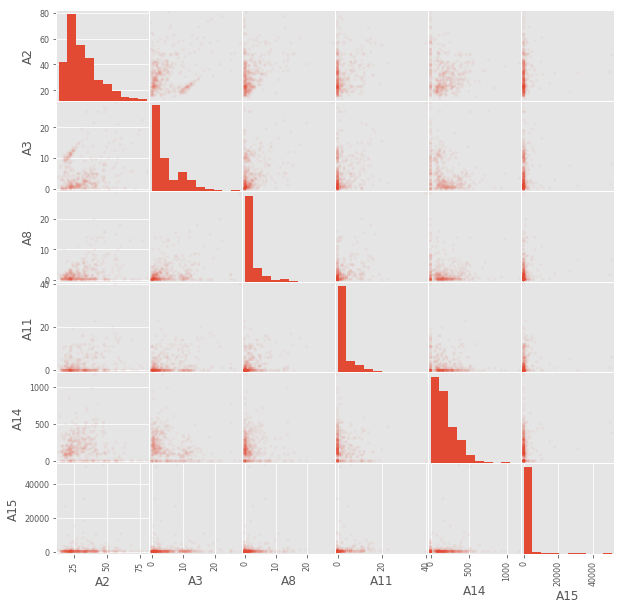

In [16]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(X_data, alpha=0.05, figsize=(10, 10));

In [17]:
X_data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.207524,0.363002,0.224627,-0.068912,0.068631
A3,0.207524,1.000000,0.346883,0.290460,-0.254471,0.024471
A8,0.363002,0.346883,1.000000,0.391390,-0.079320,0.096005
A11,0.224627,0.290460,0.391390,1.000000,-0.162471,0.088158
A14,-0.068912,-0.254471,-0.079320,-0.162471,1.000000,0.084787
A15,0.068631,0.024471,0.096005,0.088158,0.084787,1.000000


In [19]:
data = pd.concat((X_data, y_data), axis=1)
data.corr()

,A2,A3,A8,A11,A14,A15,class
A2,1.000000,0.207524,0.363002,0.224627,-0.068912,0.068631,0.152538
A3,0.207524,1.000000,0.346883,0.290460,-0.254471,0.024471,0.180746
A8,0.363002,0.346883,1.000000,0.391390,-0.079320,0.096005,0.322850
A11,0.224627,0.290460,0.391390,1.000000,-0.162471,0.088158,0.418553
A14,-0.068912,-0.254471,-0.079320,-0.162471,1.000000,0.084787,-0.129575
A15,0.068631,0.024471,0.096005,0.088158,0.084787,1.000000,0.199872
class,0.152538,0.180746,0.322850,0.418553,-0.129575,0.199872,1.000000


In [24]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,35.58,0.75,u,g,k,v,1.500,f,f,0,t,g,231.0,0,0
1,b,34.92,2.50,u,g,w,v,0.000,t,f,0,t,g,239.0,200,1
2,b,NaN,4.00,y,p,i,v,0.085,f,f,0,t,g,411.0,0,0
3,a,46.08,3.00,u,g,c,v,2.375,t,t,8,t,g,396.0,4159,1
4,a,23.58,0.83,u,g,q,v,0.415,f,t,1,t,g,200.0,11,0


In [35]:
print type(data['class'][4])
data['class'] = pd.DataFrame(data['class'], dtype=float)
print type(data['class'][4])

<type 'numpy.int64'>
<type 'numpy.float64'>


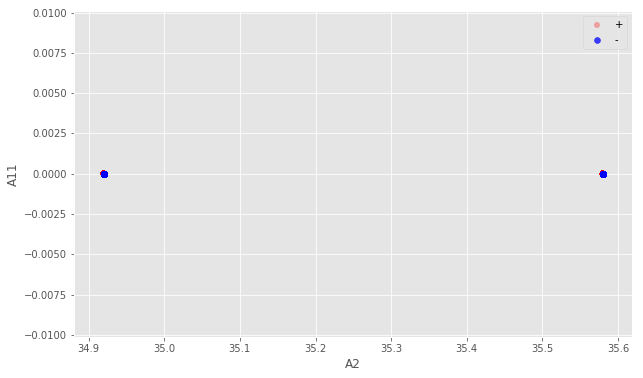

In [39]:
col1 = 'A2'
col2 = 'A11'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

In [41]:
data.count(axis=0)

A1       476
A2       476
A3       483
A4       479
A5       479
A6       477
A7       477
A8       483
A9       483
A10      483
A11      483
A12      483
A13      483
A14      477
A15      483
class    483
dtype: int64

In [43]:
data = data.fillna(data.median(axis=0), axis=0)
data.count(axis=0)

A1       476
A2       483
A3       483
A4       479
A5       479
A6       477
A7       477
A8       483
A9       483
A10      483
A11      483
A12      483
A13      483
A14      483
A15      483
class    483
dtype: int64

In [44]:
data['A1'].describe()

count     476
unique      2
top         b
freq      329
Name: A1, dtype: object

In [45]:
data['A1'] = data['A1'].fillna('b')

In [46]:
data['A1'].describe()

count     483
unique      2
top         b
freq      336
Name: A1, dtype: object

In [47]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [48]:
data.count(axis=0)

A1       483
A2       483
A3       483
A4       483
A5       483
A6       483
A7       483
A8       483
A9       483
A10      483
A11      483
A12      483
A13      483
A14      483
A15      483
class    483
dtype: int64

In [49]:
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13
count,483,483,483,483,483,483,483,483,483
unique,2,3,3,14,8,2,2,2,3
top,b,u,g,c,v,t,f,f,g
freq,336,368,368,97,285,261,270,253,439


In [50]:
data.describe()

,A2,A3,A8,A11,A14,A15,class
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,31.511180,4.796056,2.171170,2.387164,184.670807,951.000000,0.459627
std,11.974781,5.116264,3.352241,4.352373,164.510128,4089.710922,0.498884
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,0.980000,0.165000,0.000000,80.000000,0.000000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,6.000000,0.000000
75%,37.750000,7.500000,2.500000,3.000000,278.000000,459.500000,1.000000
max,80.250000,28.000000,28.500000,40.000000,1160.000000,51100.000000,1.000000


In [60]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print binary_columns, nonbinary_columns

['A1', 'A9', 'A10', 'A12'] ['A4', 'A5', 'A6', 'A7', 'A13']


In [52]:
print type(data['class'][4])
data['class'] = pd.DataFrame(data['class'], dtype=int)
print type(data['class'][4])

<type 'numpy.float64'>
<type 'numpy.int32'>


In [53]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print binary_columns, nonbinary_columns

['A1', 'A9', 'A10', 'A12'] ['A4', 'A5', 'A6', 'A7', 'A13']


In [55]:
data['A1'].describe()

count    483.000000
mean       0.304348
std        0.460608
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A1, dtype: float64

In [56]:
data['A9'].describe()

count     483
unique      2
top         t
freq      261
Name: A9, dtype: object

In [57]:
data.at[data['A9'] == 't', 'A9'] = 0
data.at[data['A9'] == 'f', 'A9'] = 1
data['A9'].describe()

count    483.000000
mean       0.459627
std        0.498884
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A9, dtype: float64

In [63]:
print data['A10'].describe()
print X_data[c].unique()

count     483
unique      2
top         f
freq      270
Name: A10, dtype: object
['f' 't']


In [64]:
data.at[data['A10'] == 't', 'A10'] = 0
data.at[data['A10'] == 'f', 'A10'] = 1
data['A10'].describe()

count    483.000000
mean       0.559006
std        0.497021
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: A10, dtype: float64

In [65]:
print data['A12'].describe()
print data['A12'].unique()

count     483
unique      2
top         f
freq      253
Name: A12, dtype: object
['t' 'f']


In [66]:
data.at[data['A12'] == 'f', 'A12'] = 0
data.at[data['A12'] == 't', 'A12'] = 1
data['A12'].describe()

count    483.000000
mean       0.476190
std        0.499951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A12, dtype: float64

In [67]:
data[binary_columns].describe()

,A1,A9,A10,A12
count,483.000000,483.000000,483.000000,483.000000
mean,0.304348,0.459627,0.559006,0.476190
std,0.460608,0.498884,0.497021,0.499951
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [68]:
data['A4'].unique()

array(['u', 'y', 'l'], dtype=object)

In [69]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print data_nonbinary.columns

Index([u'A4_l', u'A4_u', u'A4_y', u'A5_g', u'A5_gg', u'A5_p', u'A6_aa',
       u'A6_c', u'A6_cc', u'A6_d', u'A6_e', u'A6_ff', u'A6_i', u'A6_j',
       u'A6_k', u'A6_m', u'A6_q', u'A6_r', u'A6_w', u'A6_x', u'A7_bb',
       u'A7_dd', u'A7_ff', u'A7_h', u'A7_j', u'A7_n', u'A7_v', u'A7_z',
       u'A13_g', u'A13_p', u'A13_s'],
      dtype='object')


In [70]:
data_nonbinary.head

<bound method DataFrame.head of      A4_l  A4_u  A4_y  A5_g  A5_gg  A5_p  A6_aa  A6_c  A6_cc  A6_d  ...    \
0       0     1     0     1      0     0      0     0      0     0  ...     
1       0     1     0     1      0     0      0     0      0     0  ...     
2       0     0     1     0      0     1      0     0      0     0  ...     
3       0     1     0     1      0     0      0     1      0     0  ...     
4       0     1     0     1      0     0      0     0      0     0  ...     
5       0     1     0     1      0     0      0     0      0     0  ...     
6       0     1     0     1      0     0      0     0      0     0  ...     
7       0     1     0     1      0     0      0     0      0     0  ...     
8       0     1     0     1      0     0      0     0      0     0  ...     
9       0     1     0     1      0     0      0     1      0     0  ...     
10      0     0     1     0      0     1      0     0      0     0  ...     
11      0     1     0     1      0     0    

In [71]:
data_numerical = data[numerical_columns]
print data_numerical

        A2      A3      A8   A11    A14   A15
0    35.58   0.750   1.500   0.0  231.0     0
1    34.92   2.500   0.000   0.0  239.0   200
2    28.50   4.000   0.085   0.0  411.0     0
3    46.08   3.000   2.375   8.0  396.0  4159
4    23.58   0.830   0.415   1.0  200.0    11
5    23.00   0.750   0.500   0.0  320.0     0
6    23.25   1.500   2.375   3.0    0.0   582
7    22.92   1.250   0.250   0.0  120.0   809
8    38.67   0.210   0.085   0.0  280.0     0
9    28.67   1.040   2.500   5.0  300.0  1430
10   26.17  12.500   1.250   0.0    0.0    17
11   28.50   0.375   0.875   0.0  928.0     0
12   18.92   9.250   1.000   4.0   80.0   500
13   21.58   0.790   0.665   0.0  160.0     0
14   80.25   5.500   0.540   0.0    0.0   340
15   20.83   3.000   0.040   0.0  100.0     0
16   56.42  28.000  28.500  40.0    0.0    15
17   22.67  10.500   1.335   0.0  100.0     0
18   22.67   2.540   2.585   0.0    0.0     0
19   22.33  11.000   2.000   1.0   80.0   278
20   51.33  10.000   0.000  11.0  

In [72]:
data.head

<bound method DataFrame.head of      A1     A2      A3 A4 A5  A6  A7      A8  A9  A10   A11  A12 A13    A14  \
0     0  35.58   0.750  u  g   k   v   1.500   1    1   0.0    1   g  231.0   
1     0  34.92   2.500  u  g   w   v   0.000   0    1   0.0    1   g  239.0   
2     0  28.50   4.000  y  p   i   v   0.085   1    1   0.0    1   g  411.0   
3     1  46.08   3.000  u  g   c   v   2.375   0    0   8.0    1   g  396.0   
4     1  23.58   0.830  u  g   q   v   0.415   1    0   1.0    1   g  200.0   
5     0  23.00   0.750  u  g   m   v   0.500   0    1   0.0    1   s  320.0   
6     0  23.25   1.500  u  g   q   v   2.375   0    0   3.0    1   g    0.0   
7     1  22.92   1.250  u  g   q   v   0.250   1    1   0.0    1   g  120.0   
8     0  38.67   0.210  u  g   k   v   0.085   0    1   0.0    1   g  280.0   
9     1  28.67   1.040  u  g   c   v   2.500   0    0   5.0    1   g  300.0   
10    0  26.17  12.500  y  p   k   h   1.250   1    1   0.0    1   g    0.0   
11    0  28.50   0.3

In [73]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02
mean,-3.889228e-16,-1.746935e-17,1.528568e-16,-9.033492e-17,-3.815673e-17,9.021999e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.483215e+00,-9.374137e-01,-6.476772e-01,-5.484740e-01,-1.122550e+00,-2.325348e-01
25%,-7.383167e-01,-7.458677e-01,-5.984564e-01,-5.484740e-01,-6.362575e-01,-2.325348e-01
50%,-2.514601e-01,-3.999121e-01,-3.493692e-01,-5.484740e-01,-1.499653e-01,-2.310677e-01
75%,5.209966e-01,5.284998e-01,9.809267e-02,1.408051e-01,5.673158e-01,-1.201796e-01
max,4.070122e+00,4.535330e+00,7.854099e+00,8.641914e+00,5.928688e+00,1.226224e+01


In [78]:
data_general = pd.concat((data_numerical, data[binary_columns], data_nonbinary, y_data), axis=1)
data_general = pd.DataFrame(data_general, dtype=float)
print data_general.shape
print data_general.columns
data_general.head

(483, 42)
Index([u'A2', u'A3', u'A8', u'A11', u'A14', u'A15', u'A1', u'A9', u'A10',
       u'A12', u'A4_l', u'A4_u', u'A4_y', u'A5_g', u'A5_gg', u'A5_p', u'A6_aa',
       u'A6_c', u'A6_cc', u'A6_d', u'A6_e', u'A6_ff', u'A6_i', u'A6_j',
       u'A6_k', u'A6_m', u'A6_q', u'A6_r', u'A6_w', u'A6_x', u'A7_bb',
       u'A7_dd', u'A7_ff', u'A7_h', u'A7_j', u'A7_n', u'A7_v', u'A7_z',
       u'A13_g', u'A13_p', u'A13_s', u'class'],
      dtype='object')


<bound method DataFrame.head of            A2        A3        A8       A11       A14       A15   A1   A9  \
0    0.339782 -0.790822 -0.200215 -0.548474  0.281619 -0.232535  0.0  1.0   
1    0.284667 -0.448776 -0.647677 -0.548474  0.330248 -0.183632  0.0  0.0   
2   -0.251460 -0.155593 -0.622321 -0.548474  1.375777 -0.232535  0.0  1.0   
3    1.216625 -0.351048  0.060804  1.289604  1.284597  0.784408  1.0  0.0   
4   -0.662324 -0.775186 -0.523879 -0.318714  0.093181 -0.229845  1.0  1.0   
5   -0.710759 -0.790822 -0.498523 -0.548474  0.822619 -0.232535  0.0  0.0   
6   -0.689882 -0.644231  0.060804  0.140805 -1.122550 -0.090226  0.0  0.0   
7   -0.717439 -0.693095 -0.573100 -0.548474 -0.393111 -0.034721  1.0  1.0   
8    0.597825 -0.896368 -0.622321 -0.548474  0.579473 -0.232535  0.0  0.0   
9   -0.237264 -0.734140  0.098093  0.600325  0.701046  0.117123  1.0  0.0   
10  -0.446036  1.505775 -0.274792 -0.548474 -1.122550 -0.228378  0.0  1.0   
11  -0.251460 -0.864118 -0.386658 -0.548474 

In [88]:
X = data_general.drop(('class'), axis=1)  # Выбрасываем столбец 'class'.
y = data_general['class']
feature_names = X.columns
print feature_names

Index([u'A2', u'A3', u'A8', u'A11', u'A14', u'A15', u'A1', u'A9', u'A10',
       u'A12', u'A4_l', u'A4_u', u'A4_y', u'A5_g', u'A5_gg', u'A5_p', u'A6_aa',
       u'A6_c', u'A6_cc', u'A6_d', u'A6_e', u'A6_ff', u'A6_i', u'A6_j',
       u'A6_k', u'A6_m', u'A6_q', u'A6_r', u'A6_w', u'A6_x', u'A7_bb',
       u'A7_dd', u'A7_ff', u'A7_h', u'A7_j', u'A7_n', u'A7_v', u'A7_z',
       u'A13_g', u'A13_p', u'A13_s'],
      dtype='object')


In [89]:
X.shape

(483, 41)

In [90]:
y.shape

(483L,)

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print N_train, N_test

338 145


In [92]:
categorical_columns_X = [c for c in X.columns if X[c].dtype.name == 'object']
numerical_columns_X   = [c for c in X.columns if X[c].dtype.name != 'object']
print categorical_columns_X
print numerical_columns_X

[]
['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s']


In [93]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [94]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print err_train, err_test

0.13609467455621302 0.1793103448275862


In [96]:
from sklearn.model_selection import GridSearchCV

n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print best_cv_err, best_n_neighbors

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.20414201183431957 7


In [97]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print err_train, err_test

0.16568047337278108 0.1724137931034483


In [98]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print err_train, err_test

0.12721893491124261 0.18620689655172415


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [99]:
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print 'CV error    = ', 1 - grid.best_score_
print 'best C      = ', grid.best_estimator_.C
print 'best gamma  = ', grid.best_estimator_.gamma

CV error    =  0.13313609467455623
best C      =  100.0
best gamma  =  0.01


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [100]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print err_train, err_test

0.07100591715976332 0.2206896551724138


In [101]:
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print 'CV error    = ', 1 - grid.best_score_
print 'best C      = ', grid.best_estimator_.C

CV error    =  0.13905325443786987
best C      =  0.1


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [102]:
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print err_train, err_test

0.13609467455621302 0.18620689655172415


In [103]:
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print 'CV error    = ', 1 - grid.best_score_
print 'best C      = ', grid.best_estimator_.C
print 'best gamma  = ', grid.best_estimator_.gamma
print 'best degree = ', grid.best_estimator_.degree

CV error    =  0.1449704142011834
best C      =  0.0001
best gamma  =  10.0
best degree =  2


In [104]:
svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
          gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print err_train, err_test

0.09467455621301775 0.18620689655172415


In [106]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print err_train, err_test

0.0 0.15172413793103448


In [107]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'A9   ' (0.2593)
 2. feature 'A8   ' (0.1075)
 3. feature 'A14  ' (0.0796)
 4. feature 'A15  ' (0.0756)
 5. feature 'A11  ' (0.0750)
 6. feature 'A2   ' (0.0726)
 7. feature 'A3   ' (0.0698)
 8. feature 'A10  ' (0.0517)
 9. feature 'A6_x ' (0.0168)
10. feature 'A1   ' (0.0146)
11. feature 'A7_h ' (0.0129)
12. feature 'A6_cc' (0.0123)
13. feature 'A12  ' (0.0122)
14. feature 'A6_q ' (0.0105)
15. feature 'A7_v ' (0.0090)
16. feature 'A6_ff' (0.0086)
17. feature 'A4_y ' (0.0084)
18. feature 'A6_i ' (0.0083)
19. feature 'A6_w ' (0.0082)
20. feature 'A6_k ' (0.0079)
21. feature 'A7_ff' (0.0076)
22. feature 'A5_p ' (0.0074)
23. feature 'A6_c ' (0.0073)
24. feature 'A4_u ' (0.0070)
25. feature 'A5_g ' (0.0070)
26. feature 'A13_g' (0.0057)
27. feature 'A13_s' (0.0057)
28. feature 'A6_aa' (0.0049)
29. feature 'A7_bb' (0.0047)
30. feature 'A6_m ' (0.0034)
31. feature 'A6_d ' (0.0034)
32. feature 'A6_e ' (0.0029)
33. feature 'A7_n ' (0.0029)
34. feature 'A6_j ' (0

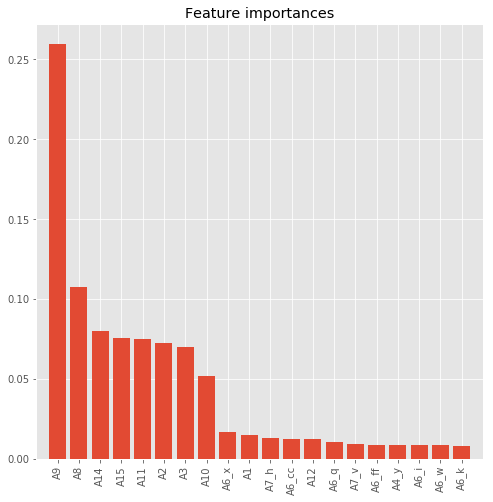

In [108]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [109]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index([u'A9', u'A8', u'A14', u'A15', u'A11', u'A2', u'A3', u'A10'], dtype='object')


In [110]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print err_train, err_test

0.011834319526627219 0.20689655172413793


In [111]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print err_train, err_test

0.011834319526627219 0.19310344827586207


In [112]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print err_train, err_test

0.0 0.15172413793103448


In [115]:
param_grid = { 
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print CV_rfc.best_params_

{'max_features': 'auto', 'n_estimators': 100}


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [122]:
rf = ensemble.RandomForestClassifier(n_estimators=50, max_features= 'auto' , random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print err_train, err_test

0.0 0.14482758620689656


In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=50, max_features= 'auto' , random_state=11)
rf.fit(X, y)


In [124]:
work_y = pd.read_csv('crx_data_test_x.csv', header=None, na_values='?')
work_y.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,b,26.67,2.710,y,p,cc,v,5.25,t,t,1,f,g,211.0,0
1,b,44.25,11.000,y,p,d,v,1.50,t,f,0,f,s,0.0,0
2,b,19.58,0.585,u,g,ff,ff,0.00,f,t,3,f,g,350.0,769
3,a,41.33,1.000,u,g,i,bb,2.25,t,f,0,t,g,0.0,300
4,a,45.00,4.585,u,g,k,h,1.00,f,f,0,t,s,240.0,0


In [125]:
example_y = pd.read_csv('submission_example.txt', header=None, na_values='?')
example_y.head()

,0
0,0
1,1
2,0
3,1
4,0


In [126]:
work_y.shape

(207, 15)

In [127]:
work_y.columns = ['A' + str(i) for i in range(1, 16)]
work_y.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,26.67,2.710,y,p,cc,v,5.25,t,t,1,f,g,211.0,0
1,b,44.25,11.000,y,p,d,v,1.50,t,f,0,f,s,0.0,0
2,b,19.58,0.585,u,g,ff,ff,0.00,f,t,3,f,g,350.0,769
3,a,41.33,1.000,u,g,i,bb,2.25,t,f,0,t,g,0.0,300
4,a,45.00,4.585,u,g,k,h,1.00,f,f,0,t,s,240.0,0


In [128]:
work_y.describe()

,A2,A3,A8,A11,A14,A15
count,202.000000,207.000000,207.000000,207.000000,200.000000,207.000000
mean,31.598119,4.671618,2.345290,2.429952,181.710000,1172.285024
std,11.750332,4.650777,3.338027,5.896656,192.558641,7184.841681
min,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.542500,1.105000,0.165000,0.000000,60.000000,0.000000
50%,28.250000,2.750000,1.165000,0.000000,160.000000,2.000000
75%,38.022500,7.000000,3.000000,2.000000,265.250000,300.000000
max,69.170000,22.000000,20.000000,67.000000,2000.000000,100000.000000


In [129]:
categorical_columns = [c for c in work_y.columns if work_y[c].dtype.name == 'object']
numerical_columns   = [c for c in work_y.columns if work_y[c].dtype.name != 'object']
print categorical_columns
print numerical_columns

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [130]:
work_y[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
count,202,205,205,204,204,207,207,207,207
unique,2,3,3,14,9,2,2,2,3
top,b,u,g,c,v,f,f,f,g
freq,139,155,155,46,120,107,125,121,186


In [131]:
for c in categorical_columns:
    print work_y[c].unique()

['b' 'a' nan]
['y' 'u' nan 'l']
['p' 'g' nan 'gg']
['cc' 'd' 'ff' 'i' 'k' 'aa' 'w' 'm' 'j' 'x' 'e' nan 'c' 'q' 'r']
['v' 'ff' 'bb' 'h' 'j' nan 'z' 'o' 'n' 'dd']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']


In [132]:
work_y.count(axis=0)

A1     202
A2     202
A3     207
A4     205
A5     205
A6     204
A7     204
A8     207
A9     207
A10    207
A11    207
A12    207
A13    207
A14    200
A15    207
dtype: int64

In [133]:
work_y = work_y.fillna(work_y.median(axis=0), axis=0)
work_y.count(axis=0)

A1     202
A2     207
A3     207
A4     205
A5     205
A6     204
A7     204
A8     207
A9     207
A10    207
A11    207
A12    207
A13    207
A14    207
A15    207
dtype: int64

In [134]:
work_y_describe = work_y.describe(include=[object])
for c in categorical_columns:
    work_y[c] = work_y[c].fillna(work_y_describe[c]['top'])

In [135]:
work_y.count(axis=0)

A1     207
A2     207
A3     207
A4     207
A5     207
A6     207
A7     207
A8     207
A9     207
A10    207
A11    207
A12    207
A13    207
A14    207
A15    207
dtype: int64

In [136]:
work_y.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13
count,207,207,207,207,207,207,207,207,207
unique,2,3,3,14,9,2,2,2,3
top,b,u,g,c,v,f,f,f,g
freq,144,157,157,49,123,107,125,121,186


In [137]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print binary_columns, nonbinary_columns

['A1', 'A9', 'A10', 'A12'] ['A4', 'A5', 'A6', 'A7', 'A13']


In [140]:
work_y['A1'].describe()

count     207
unique      2
top         b
freq      144
Name: A1, dtype: object

In [141]:
work_y.at[work_y['A1'] == 'b', 'A1'] = 0
work_y.at[work_y['A1'] == 'a', 'A1'] = 1
work_y['A1'].describe()

count    207.000000
mean       0.304348
std        0.461246
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A1, dtype: float64

In [142]:
work_y['A9'].describe()

count     207
unique      2
top         f
freq      107
Name: A9, dtype: object

In [145]:
work_y.at[work_y['A9'] == 'f', 'A9'] = 0
work_y.at[work_y['A9'] == 't', 'A9'] = 1
work_y['A9'].describe()

count    207.000000
mean       0.483092
std        0.500925
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A9, dtype: float64

In [146]:
work_y['A10'].describe()

count     207
unique      2
top         f
freq      125
Name: A10, dtype: object

In [147]:
work_y.at[work_y['A10'] == 'f', 'A10'] = 0
work_y.at[work_y['A10'] == 't', 'A10'] = 1
work_y['A10'].describe()

count    207.000000
mean       0.396135
std        0.490279
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A10, dtype: float64

In [148]:
work_y['A12'].describe()

count     207
unique      2
top         f
freq      121
Name: A12, dtype: object

In [149]:
work_y.at[work_y['A12'] == 'f', 'A12'] = 0
work_y.at[work_y['A12'] == 't', 'A12'] = 1
work_y['A12'].describe()

count    207.000000
mean       0.415459
std        0.493996
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A12, dtype: float64

In [151]:
work_y[binary_columns].describe()

,A1,A9,A10,A12
count,207.000000,207.000000,207.000000,207.000000
mean,0.304348,0.483092,0.396135,0.415459
std,0.461246,0.500925,0.490279,0.493996
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [153]:
work_y_nonbinary = pd.get_dummies(work_y[nonbinary_columns])
print work_y_nonbinary.columns

Index([u'A4_l', u'A4_u', u'A4_y', u'A5_g', u'A5_gg', u'A5_p', u'A6_aa',
       u'A6_c', u'A6_cc', u'A6_d', u'A6_e', u'A6_ff', u'A6_i', u'A6_j',
       u'A6_k', u'A6_m', u'A6_q', u'A6_r', u'A6_w', u'A6_x', u'A7_bb',
       u'A7_dd', u'A7_ff', u'A7_h', u'A7_j', u'A7_n', u'A7_o', u'A7_v',
       u'A7_z', u'A13_g', u'A13_p', u'A13_s'],
      dtype='object')


In [154]:
work_y_nonbinary.head

<bound method DataFrame.head of      A4_l  A4_u  A4_y  A5_g  A5_gg  A5_p  A6_aa  A6_c  A6_cc  A6_d  ...    \
0       0     0     1     0      0     1      0     0      1     0  ...     
1       0     0     1     0      0     1      0     0      0     1  ...     
2       0     1     0     1      0     0      0     0      0     0  ...     
3       0     1     0     1      0     0      0     0      0     0  ...     
4       0     1     0     1      0     0      0     0      0     0  ...     
5       0     1     0     1      0     0      0     0      0     0  ...     
6       0     1     0     1      0     0      1     0      0     0  ...     
7       0     1     0     1      0     0      0     0      0     0  ...     
8       0     1     0     1      0     0      0     0      0     0  ...     
9       0     1     0     1      0     0      0     0      0     0  ...     
10      0     0     1     0      0     1      0     0      0     0  ...     
11      0     1     0     1      0     0    

In [155]:
work_y_numerical = work_y[numerical_columns]
work_y_numerical = (work_y_numerical - work_y_numerical.mean()) / work_y_numerical.std()
work_y_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02,2.070000e+02
mean,5.202494e-16,-3.057136e-16,-3.770468e-16,6.596977e-17,2.145359e-17,8.983689e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.350220e+00,-1.004481e+00,-7.025976e-01,-4.120898e-01,-9.560286e-01,-1.631609e-01
25%,-7.546075e-01,-7.668866e-01,-6.531672e-01,-4.120898e-01,-6.073750e-01,-1.631609e-01
50%,-2.812159e-01,-4.131822e-01,-3.535891e-01,-4.120898e-01,-1.108076e-01,-1.628825e-01
75%,5.183857e-01,5.006436e-01,1.961369e-01,-7.291449e-02,4.174554e-01,-1.214063e-01
max,3.240818e+00,3.725911e+00,5.288966e+00,1.095028e+01,9.609233e+00,1.375503e+01


In [156]:
work_y_general = pd.concat((work_y_numerical, work_y[binary_columns], work_y_nonbinary), axis=1)
work_y_general = pd.DataFrame(work_y_general, dtype=float)
print work_y_general.shape
print work_y_general.columns
work_y_general.head

(207, 42)
Index([u'A2', u'A3', u'A8', u'A11', u'A14', u'A15', u'A1', u'A9', u'A10',
       u'A12', u'A4_l', u'A4_u', u'A4_y', u'A5_g', u'A5_gg', u'A5_p', u'A6_aa',
       u'A6_c', u'A6_cc', u'A6_d', u'A6_e', u'A6_ff', u'A6_i', u'A6_j',
       u'A6_k', u'A6_m', u'A6_q', u'A6_r', u'A6_w', u'A6_x', u'A7_bb',
       u'A7_dd', u'A7_ff', u'A7_h', u'A7_j', u'A7_n', u'A7_o', u'A7_v',
       u'A7_z', u'A13_g', u'A13_p', u'A13_s'],
      dtype='object')


<bound method DataFrame.head of            A2        A3        A8       A11       A14       A15   A1   A9  \
0   -0.417208 -0.421783  0.870188 -0.242502  0.158607 -0.163161  0.0  1.0   
1    1.095924  1.360715 -0.253230 -0.412090 -0.956029 -0.163161  0.0  1.0   
2   -1.027453 -0.878696 -0.702598  0.096673  0.892892 -0.056130  0.0  0.0   
3    0.844596 -0.789463 -0.028547 -0.412090 -0.956029 -0.121406  1.0  1.0   
4    1.160477 -0.018624 -0.403019 -0.412090  0.311803 -0.163161  1.0  0.0   
5    0.902263 -0.960403  0.832740 -0.412090  1.157024 -0.163161  0.0  1.0   
6   -0.467990  0.858648 -0.278695 -0.412090 -0.110808 -0.142284  1.0  1.0   
7    0.235211 -0.628200 -0.627703 -0.412090 -0.094960 -0.163161  0.0  1.0   
8    2.171814  1.629487 -0.328125  0.266261  0.100498 -0.163161  0.0  1.0   
9   -0.266584 -0.251919 -0.452450 -0.412090  0.523108 -0.163161  1.0  1.0   
10  -0.840679 -0.628200 -0.702598 -0.412090 -0.110808 -0.163161  1.0  0.0   
11   0.572611  1.172574  0.046348  0.605436 

In [160]:
work_y_general=work_y_general.drop(('A7_o'), axis=1)


KeyError: "['A7_o'] not found in axis"

In [161]:
print work_y_general.columns


Index([u'A2', u'A3', u'A8', u'A11', u'A14', u'A15', u'A1', u'A9', u'A10',
       u'A12', u'A4_l', u'A4_u', u'A4_y', u'A5_g', u'A5_gg', u'A5_p', u'A6_aa',
       u'A6_c', u'A6_cc', u'A6_d', u'A6_e', u'A6_ff', u'A6_i', u'A6_j',
       u'A6_k', u'A6_m', u'A6_q', u'A6_r', u'A6_w', u'A6_x', u'A7_bb',
       u'A7_dd', u'A7_ff', u'A7_h', u'A7_j', u'A7_n', u'A7_v', u'A7_z',
       u'A13_g', u'A13_p', u'A13_s'],
      dtype='object')


In [162]:
work_y_general.shape

(207, 41)

In [163]:
rf = ensemble.RandomForestClassifier(n_estimators=50, max_features= 'auto' , random_state=11)
rf.fit(X, y)

prediction = rf.predict(work_y_general)
print prediction

[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.]


In [166]:
type(prediction)

numpy.ndarray

In [165]:
file_obj = open('output.txt', 'w')
file_obj.write('fdhfg')
file_obj.close()

In [167]:
with open('test.txt', 'w') as f:
    f.write("\n".join(map(str, prediction)))

In [168]:
type(prediction[5])

numpy.float64

In [172]:
prediction

,0
0,0
1,0
2,1
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [179]:
type(prediction)

pandas.core.frame.DataFrame

In [181]:
np.savetxt('test.txt', prediction.values, fmt='%d')